In [1]:
!pwd
!ls
!rm -r *
!ls
!git clone 'https://github.com/giangbang/traffic-flow-simulator.git'

In [5]:
agent = None
env = None
# contains TraCI control loop
def run(episodes):
                             
    traci.start(nogui)
    env = environment()
    agent = agents(env.state_size(), env.action_size())
#     agent.load_policy('model.pt')
    traci.close()
    epsilon = 0.1
    ep = 0.
    while ep < episodes:
        ep+=1
        print(ep)
        epsilon = ep / (episodes - 1.1)

#         if (ep == episodes - 1):
#             traci.start(gui)
#         else: 
        traci.start(nogui)
        step = 0
        prev = env.getState()
        reward = env.reward()
        action = agent.select_actions(1 , prev)
        print(action)
        print(epsilon)
        while traci.simulation.getMinExpectedNumber() > 0 and step < 5e3:
            traci.simulationStep()
            env.do_action(action)
            env.cumulateWaitingTime()
            if (step % 20 == 0):
                state = env.getState()
                reward = env.reward()
#                 print('reward:', reward)
                agent.add_memmory(prev, action, state, reward)
                action = agent.select_actions(epsilon , state)
                
            agent.train()
            step += 1
        print(len(agent.mem))      
        if (step >= 5e3-1):
            print('fail to complete the episode')
        print(step)
        traci.close()
        
    agent.save_policy('model.pt')
    sys.stdout.flush()
    agent.plot()

In [6]:
default_run()

{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'11_1', '21_0', '41_2', '11_0', '11_3', '31_0', '21_4', '11_2', '41_3', ':0_w1_0', '31_1', '21_2', '31_3', '41_0', ':0_w2_0', '21_3', '21_1', '31_2', '41_1'}}
total waiting time of defaul cyclic traffic light 1335


{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'11_0', '11_3', '11_2', '41_0', '21_2', '31_1', '21_1', '31_2', '21_4', '21_0', ':0_w1_0', ':0_w2_0', '41_2', '31_3', '11_1', '31_0', '41_1', '41_3', '21_3'}}
device available:  cpu
1.0
[[5]]
0.052910052910052914
68
1348
2.0
[[5]]
0.10582010582010583


C:\Users\Mr.Son\anaconda3\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([32, 32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


146
1545
3.0
[[1]]
0.15873015873015875
214
1347
4.0
[[1]]
0.21164021164021166
284
1397
5.0
[[1]]
0.2645502645502646
355
1415
6.0
[[1]]
0.3174603174603175
437
1628
7.0
[[1]]
0.3703703703703704
502
1294
8.0
[[1]]
0.4232804232804233
581
1561
9.0
[[1]]
0.4761904761904762
657
1520
10.0
[[1]]
0.5291005291005292
736
1580
11.0
[[1]]
0.5820105820105821
856
2388
12.0
[[1]]
0.634920634920635
927
1414
13.0
[[1]]
0.6878306878306879
1001
2290
14.0
[[1]]
0.7407407407407408
1001
1981
15.0
[[1]]
0.7936507936507937
1001
2172
16.0
[[1]]
0.8465608465608466
1001
2497
17.0
[[1]]
0.8994708994708995
1001
3473
18.0
[[3]]
0.9523809523809524
1001
fail to complete the episode
5000
19.0
[[3]]
1.0052910052910053
1001
fail to complete the episode
5000
20.0
[[3]]
1.0582010582010584
1001
fail to complete the episode
5000


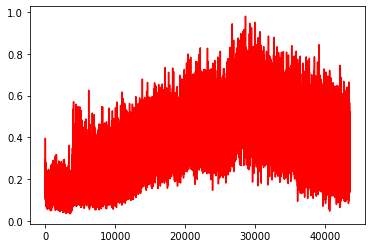

In [6]:
import traceback

try:
    run(episodes=20)
except Exception as e:
    traceback.print_exc()
    traci.close()


In [7]:
def demo():
    traci.start(gui)
    total_time = 0
    env = environment()
    agent = agents(env.state_size(), env.action_size())
    agent.load_policy('model.pt')
    step = 0
    prevPhase = 0
    action = [0]
    while traci.simulation.getMinExpectedNumber() > 0 and step < 5e3:
        traci.simulationStep()
        env.do_action(action)
        env.cumulateWaitingTime()
        step += 1
        if step % 50 == 0:
            state = env.getState()
            phase = env.getPhase()
            print(env.reward())

            action = agent.select_actions(1 , state, True)
            env.do_action(action)
            print('action: ', action)
    if (step >= 5e3-1):
        print('fail to complete the episode')
    print('total waiting time of rl traffic light', step)
    traci.close()

In [8]:
demo()

{'0': ['GGGGGgrrrrrrrrgGGGGgrrrrrrrGr', 'GGGGGgrrrrrrrrgGGGGgrrrrrrrrr', 'yyyyygrrrrrrrryyyyygrrrrrrrrr', 'rrrrrGrrrrrrrrrrrrrGrrrrrrrrr', 'rrrrryrrrrrrrrrrrrryrrrrrrrrr', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrG', 'rrrrrrGGGGGGGgrrrrrrgGGGGggrr', 'rrrrrryyyyyyyyrrrrrryyyyyyyrr']}
{'0': {'11_0', '11_3', '11_2', '41_0', '21_2', '31_1', '21_1', '31_2', '21_4', '21_0', ':0_w1_0', ':0_w2_0', '41_2', '31_3', '11_1', '31_0', '41_1', '41_3', '21_3'}}
device available:  cpu
[[0.]]
tensor([[-1.8558, -0.4781, -0.5854,  0.2641, -1.6386, -1.6392, -0.8999, -1.1028]])
action:  [[3]]
[[-0.342]]
tensor([[-1.5770, -0.5633, -0.4836, -0.0788, -1.4381, -1.6872, -0.8452, -1.0919]])
action:  [[3]]
[[-1.207]]
tensor([[-1.4075, -0.7503, -0.4897, -0.5250, -1.1334, -1.8405, -0.7225, -1.3978]])
action:  [[2]]
[[-2.083]]
tensor([[-1.7927, -0.6520, -0.4391, -0.6108, -1.7943, -1.4218, -0.5984, -1.9814]])
action:  [[2]]
[[-2.961]]
tensor([[-1.9812, -0.7389, -0.8294, -0.8389, -2.4197, -0.8828, -0.6489, -2.4734]])
action:  [[6]

KeyboardInterrupt: 